In [102]:
# STEP 1: DATA COLLECTION

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("C:\\Users\\User\\.vscode\\PLACEMENT DATASET\\HR_Job_Placement_Dataset.csv")
df = pd.DataFrame(data)
print(df)
print(len(df))

       age_years  gender  ssc_percentage  hsc_percentage  degree_percentage  \
0             27    Male       65.061656       83.842578          75.856526   
1             24    Male       67.885626       64.973305          73.093588   
2             33  Female       73.892471       68.834121          90.196460   
3             31    Male       74.145568       76.255126          75.586731   
4             28    Male       60.475937       65.786336          80.801010   
...          ...     ...             ...             ...                ...   
51495         24  Female       65.747180       72.063946          72.247881   
51496         22    Male       61.921459       66.729203          55.000000   
51497         30    Male       75.578202       75.717623          75.048301   
51498         29  Female       77.327209       56.629227          69.735374   
51499         26  Female       60.228166       73.374538          70.198897   

        degree_specialization  technical_score  apt

In [103]:
df.describe()

,age_years,ssc_percentage,hsc_percentage,degree_percentage,technical_score,aptitude_score,communication_score,skills_match_percentage,certifications_count,years_of_experience,previous_ctc_lpa,expected_ctc_lpa,notice_period_days,employment_gap_months
count,51500.000000,48919.000000,49435.000000,51500.000000,51500.000000,51500.000000,51500.000000,51500.000000,51500.000000,51500.000000,51500.000000,51500.000000,49918.000000,50403.000000
mean,27.505456,70.002505,72.060636,74.010825,68.027499,64.005715,66.106692,73.937491,1.400136,1.494117,4.844616,8.002649,20.095457,3.056187
std,4.025385,7.976314,7.916654,6.945579,11.855145,9.922397,9.907488,11.794258,1.184387,1.375508,2.125294,3.133792,24.852660,4.431784
min,21.000000,50.000000,50.000000,55.000000,40.000000,40.000000,45.000000,45.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,24.000000,64.574733,66.720058,69.305041,59.935988,57.204237,59.252271,65.851924,1.000000,0.000000,3.325635,5.672655,0.000000,0.000000
50%,27.000000,69.971210,72.014383,73.998187,67.986042,63.972079,66.033268,74.001772,1.000000,1.000000,4.807598,7.857337,15.000000,0.000000
75%,31.000000,75.389057,77.389894,78.707827,76.049235,70.727134,72.840985,82.112773,2.000000,2.000000,6.297570,10.093509,30.000000,6.000000
max,34.000000,95.000000,95.000000,95.000000,100.000000,100.000000,100.000000,100.000000,8.000000,5.000000,13.844566,26.524634,90.000000,18.000000


In [104]:
# STEP 2: DATA UNDERSTANDING
print(df.shape) # dataset shape & size
print(df.columns)
print(df.info) 
print(df.sample()) # sample record inspection

num_cols = df.select_dtypes(include="number").columns
print(num_cols)
catg_cols = df.select_dtypes(include = "object").columns   # datatype validation
target_col = 'status'
if "status" in catg_cols:
    catg_cols = catg_cols.drop(target_col)
df[catg_cols]= df[catg_cols].astype("category")

print(df.isnull().sum())   # null value distribution analysis

print(len(df))



(51500, 26)
Index(['age_years', 'gender', 'ssc_percentage', 'hsc_percentage',
       'degree_percentage', 'degree_specialization', 'technical_score',
       'aptitude_score', 'communication_score', 'skills_match_percentage',
       'certifications_count', 'internship_experience', 'years_of_experience',
       'career_switch_willingness', 'relevant_experience', 'previous_ctc_lpa',
       'expected_ctc_lpa', 'company_tier', 'job_role_match',
       'competition_level', 'bond_requirement', 'notice_period_days',
       'layoff_history', 'employment_gap_months', 'relocation_willingness',
       'status'],
      dtype='object')


<bound method DataFrame.info of        age_years  gender  ssc_percentage  hsc_percentage  degree_percentage  \
0             27    Male       65.061656       83.842578          75.856526   
1             24    Male       67.885626       64.973305          73.093588   
2             33  Female       73.892471       68.834121          90.196460   
3             31    Male       74.145568       76.255126          75.586731   
4             28    Male       60.475937       65.786336          80.801010   
...          ...     ...             ...             ...                ...   
51495         24  Female       65.747180       72.063946          72.247881   
51496         22    Male       61.921459       66.729203          55.000000   
51497         30    Male       75.578202       75.717623          75.048301   
51498         29  Female       77.327209       56.629227          69.735374   
51499         26  Female       60.228166       73.374538          70.198897   

        degree_spec

In [105]:
# STEP 3 : DATA CLEANING & PREPROCESSING
# HANDLING MISSING VALUES USING MEAN, MEDIAN , MODE (SIMPLEIMPUTER)

num_missing_cols = ["ssc_percentage", "hsc_percentage", "notice_period_days", "employment_gap_months"]
num_imputer = SimpleImputer(strategy="median")
df[num_missing_cols] = num_imputer.fit_transform(df[num_missing_cols])

catg_missing_cols = ["career_switch_willingness", "relevant_experience", "job_role_match", "layoff_history", "relocation_willingness"]
catg_imputer = SimpleImputer(strategy="most_frequent")
df[catg_missing_cols] = catg_imputer.fit_transform(df[catg_missing_cols])

print(df.isnull().sum())
print(len(df))

age_years                    0
gender                       0
ssc_percentage               0
hsc_percentage               0
degree_percentage            0
degree_specialization        0
technical_score              0
aptitude_score               0
communication_score          0
skills_match_percentage      0
certifications_count         0
internship_experience        0
years_of_experience          0
career_switch_willingness    0
relevant_experience          0
previous_ctc_lpa             0
expected_ctc_lpa             0
company_tier                 0
job_role_match               0
competition_level            0
bond_requirement             0
notice_period_days           0
layoff_history               0
employment_gap_months        0
relocation_willingness       0
status                       0
dtype: int64
51500


In [106]:
# CORRECTING INCONSISTENT CATEGORICAL LABELS
for col in catg_cols:
    df[col] = df[col].astype(str).str.replace('\xa0', ' ', regex=False).str.strip().str.lower()

df[target_col] = df[target_col].astype(str).str.replace('\xa0', ' ', regex=False).str.lower().str.strip()
print(len(df))

print(df[target_col].value_counts())


51500
status
not placed    35921
placed        15579
Name: count, dtype: int64


In [107]:
# ENCODING CATEGORICAL VARIABLES ( LABEL / ONEHOT ENCODING)
print(catg_cols)

df['status'] = df['status'].map({ 'not placed': 0, 'placed': 1})

df["internship_experience"] = df["internship_experience"].map({'no':0,'yes':1})

df["career_switch_willingness"] = df["career_switch_willingness"].map({'not willing':0, 'willing':1})

df["relevant_experience"] = df["relevant_experience"].map({'not relevant':0, 'relevant':1})

df["job_role_match"] = df["job_role_match"].map({'not matched':0, 'matched':1})

df["bond_requirement"] = df["bond_requirement"].map({'not required':0, 'required':1})


df["layoff_history"] = df["layoff_history"].map({'no':0, 'yes':1})

df["relocation_willingness"] = df["relocation_willingness"].map({'not willing':0, 'willing':1})

df["company_tier"] = df["company_tier"].map({'tier 1' : 1.0, 'tier 2' : 0.7, 'tier 3' : 0.4})

df["competition_level"] = df["competition_level"].map({'low' : 1.0, 'medium' : 0.7, 'high' : 0.4})
   

df = pd.get_dummies(df, columns=["gender", "degree_specialization"], drop_first=False)

print(df)

Index(['gender', 'degree_specialization', 'internship_experience',
       'career_switch_willingness', 'relevant_experience', 'company_tier',
       'job_role_match', 'competition_level', 'bond_requirement',
       'layoff_history', 'relocation_willingness'],
      dtype='object')
       age_years  ssc_percentage  hsc_percentage  degree_percentage  \
0             27       65.061656       83.842578          75.856526   
1             24       67.885626       64.973305          73.093588   
2             33       73.892471       68.834121          90.196460   
3             31       74.145568       76.255126          75.586731   
4             28       60.475937       65.786336          80.801010   
...          ...             ...             ...                ...   
51495         24       65.747180       72.063946          72.247881   
51496         22       61.921459       66.729203          55.000000   
51497         30       75.578202       75.717623          75.048301   
51498   

In [108]:
# FEATURE SCALING FOR NUMERICAL COLUMNS
scaler = StandardScaler()

X = df.drop("status", axis=1)
y = "status"

X_scaled = scaler.fit_transform(X)

print(X_scaled)
print(len(X_scaled))

[[-0.12556843 -0.63537555  1.51926682 ... -0.49993932 -0.49608304
  -0.50494062]
 [-0.87084605 -0.27210782 -0.9135195  ... -0.49993932 -0.49608304
  -0.50494062]
 [ 1.36498682  0.5005965  -0.41575042 ...  2.00024275 -0.49608304
  -0.50494062]
 ...
 [ 0.6197092   0.71744434  0.47172881 ...  2.00024275 -0.49608304
  -0.50494062]
 [ 0.37128332  0.94243187 -1.98930862 ... -0.49993932  2.01579156
  -0.50494062]
 [-0.3739943  -1.25714265  0.16963847 ...  2.00024275 -0.49608304
  -0.50494062]]
51500


In [109]:
# ================================
# LOGICAL CONSISTENCY ENFORCEMENT
# ================================

# 1. Experience & gap values cannot be negative
df['years_of_experience'] = df['years_of_experience'].clip(lower=0)
df['employment_gap_months'] = df['employment_gap_months'].clip(lower=0)

# 2. Internship consistency
# If total experience is zero, internship_experience should be 0 (No)
df.loc[df['years_of_experience'] == 0, 'internship_experience'] = 0

# 3. Relevant experience consistency
# No relevant experience if total experience is zero
df.loc[df['years_of_experience'] == 0, 'relevant_experience'] = 0

# 4. CTC logical consistency
# Avoid unrealistically low expected CTC compared to previous CTC
mask = df['expected_ctc_lpa'] < (df['previous_ctc_lpa'] * 0.5)

df.loc[mask, 'expected_ctc_lpa'] = df.loc[mask, 'previous_ctc_lpa']

# 5. Skills match percentage must be between 0 and 100
df['skills_match_percentage'] = df['skills_match_percentage'].clip(0, 100)

# 6. Notice period must be realistic (0–180 days)
df['notice_period_days'] = df['notice_period_days'].clip(0, 180)

# 7. Final validation summary
print("Logical consistency checks applied successfully.")
print(df.describe())
print(len(df))

print(df.columns)

Logical consistency checks applied successfully.
          age_years  ssc_percentage  hsc_percentage  degree_percentage  \
count  51500.000000    51500.000000    51500.000000       51500.000000   
mean      27.505456       70.000936       72.058781          74.010825   
std        4.025385        7.773871        7.756315           6.945579   
min       21.000000       50.000000       50.000000          55.000000   
25%       24.000000       64.899006       66.974815          69.305041   
50%       27.000000       69.971210       72.014383          73.998187   
75%       31.000000       75.066581       77.133064          78.707827   
max       34.000000       95.000000       95.000000          95.000000   

       technical_score  aptitude_score  communication_score  \
count     51500.000000    51500.000000         51500.000000   
mean         68.027499       64.005715            66.106692   
std          11.855145        9.922397             9.907488   
min          40.000000       40.

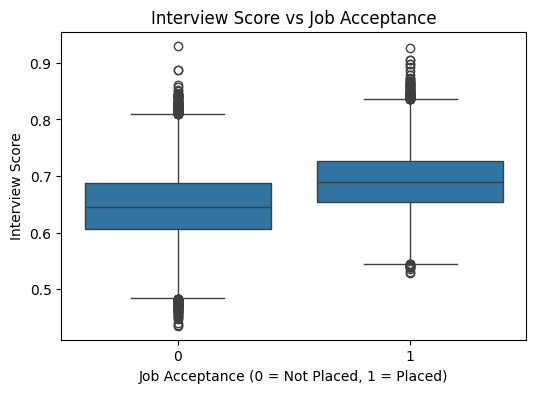

INSIGHT : Interview performance score is a primary gatekeeper for job acceptance.


In [110]:
# EXPLORATOORY DATA ANALYSIS

# Interview score vs job acceptance

df["interview_skills_score"] = (df['technical_score'] + df['aptitude_score'] + df['communication_score']) /3/100
plt.figure(figsize=(6,4))
sns.boxplot(x="status", y= "interview_skills_score", data=df)
plt.title("Interview Score vs Job Acceptance")
plt.xlabel("Job Acceptance (0 = Not Placed, 1 = Placed)")
plt.ylabel("Interview Score")
plt.show()

print("INSIGHT : Interview performance score is a primary gatekeeper for job acceptance.")

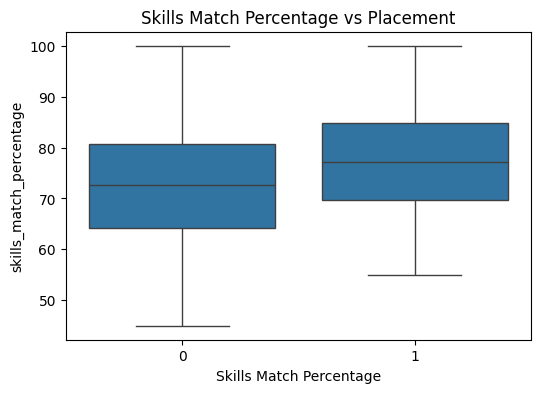

INSIGHT : Higher skills match increases chances, but doesn’t guarantee placement.


In [111]:
# SKILLS MATCH PECENTAGE IMPACT ON PLACEMENT

plt.figure(figsize=(6,4))
sns.boxplot(data=df, y='skills_match_percentage', x='status')
plt.title("Skills Match Percentage vs Placement")
plt.xlabel("Skills Match Percentage")
plt.show()

print("INSIGHT : Higher skills match increases chances, but doesn’t guarantee placement.")

In [112]:
# company tier vs acceptance rate

print(pd.crosstab(df["status"], df["company_tier"]))

print("INSIGHT : Placement probability is almost constant across company tiers.")

company_tier   0.4    0.7    1.0
status                          
0             8743  13253  13925
1             3823   5803   5953
INSIGHT : Placement probability is almost constant across company tiers.


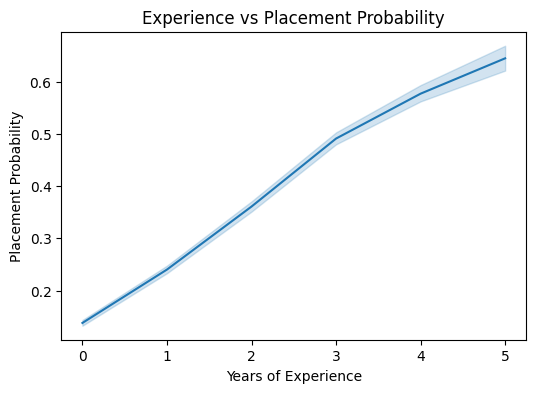

INSIGHT : Each additional year of experience significantly improves placement chances.


In [113]:
# EXPERIENCE VS PLACEMENT PROBABIITY
plt.figure(figsize=(6,4))
sns.lineplot(x='years_of_experience', y='status', data=df)
plt.title("Experience vs Placement Probability")
plt.xlabel("Years of Experience")
plt.ylabel("Placement Probability")
plt.show() 

print("INSIGHT : Each additional year of experience significantly improves placement chances.")

In [114]:
# Competition level vs job acceptance

print(pd.crosstab( df["status"], df["competition_level"]))

print("INSIGHT : Medium and high competition levels have higher placement rates than low competition.")

competition_level   0.4    0.7    1.0
status                               
0                  7909  13422  14590
1                  2469   6286   6824
INSIGHT : Medium and high competition levels have higher placement rates than low competition.


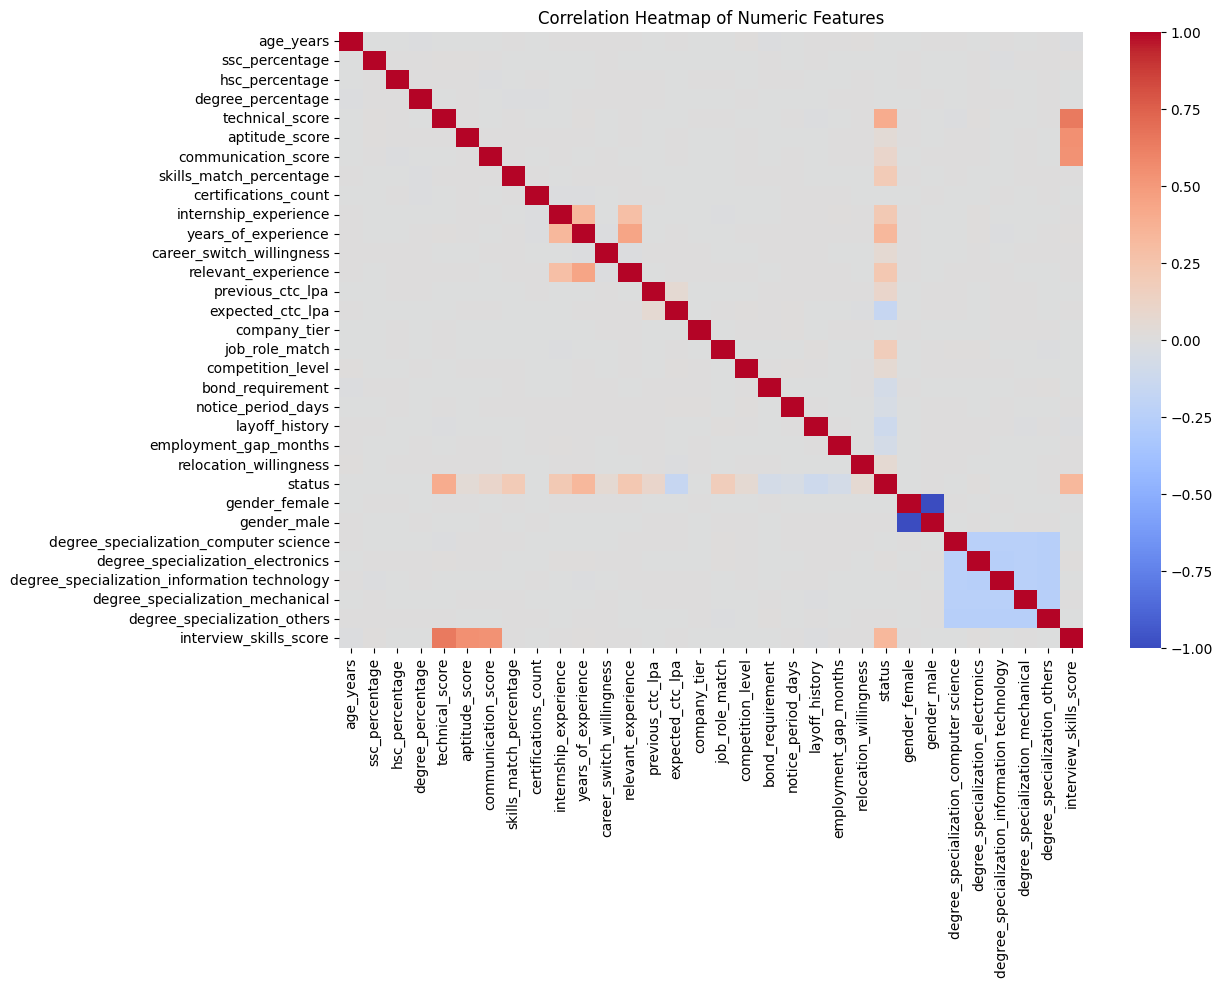

INSIGHTS : positive correlation amomg interview skills score, skills match, experience and academic scores. 


In [115]:
# Correlation analysis among numeric features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

print("INSIGHTS : positive correlation amomg interview skills score, skills match, experience and academic scores. ")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [116]:
# STEP 5 :  FEATURE ENGINEERING
# Experience category (Fresher / Junior / Senior)
df['experience_category'] = pd.cut(
    df['years_of_experience'], bins=[-1, 0, 2, 5],
    labels=['fresher', 'junior', 'senior']
)

df['experience_category'].value_counts()

experience_category
junior     24172
fresher    15400
senior     11928
Name: count, dtype: int64

In [117]:
# Academic performance bands
df['academic_performance_band'] = pd.cut((df['ssc_percentage'] + df['hsc_percentage'] + df['degree_percentage'])/3,
bins=[0, 60, 75, 100],
    labels=['poor', 'average', 'excellent']
)

df['academic_performance_band'].value_counts()

academic_performance_band
average      38718
excellent    12659
poor           123
Name: count, dtype: int64

In [118]:
# Skills match level (Low / Medium / High)

df['skills_match_level'] = pd.cut(
    df['skills_match_percentage'],
    bins=[0, 50, 75, 100],
    labels=['low', 'medium', 'high']
)

df['skills_match_level'].value_counts()

skills_match_level
medium    26289
high      24008
low        1203
Name: count, dtype: int64

In [119]:
# Interview performance category
df['interview_performance_category'] = pd.cut((
    df['technical_score'] + df['aptitude_score'] + df['communication_score'])/3,
    bins=[0, 50, 75, 100],
    labels=['poor', 'average', 'excellent']
)

df['interview_performance_category'].value_counts()


interview_performance_category
average      47515
excellent     3810
poor           175
Name: count, dtype: int64

In [120]:
# PLACEMENT PROBABILITY SCORE

df["academic_score"] = (df['ssc_percentage'] + df['hsc_percentage'] + df['degree_percentage'])/3/100

df["experience_score"] = np.minimum(df["years_of_experience"] / 5, 1)
df["certification_score"] = np.minimum(df["certifications_count"] / 5, 1)
df["skills_match_score"] = df["skills_match_percentage"]/100
df["notice_period_score"] = np.where(df["notice_period_days"] <= 15, 1, np.where(df["notice_period_days"] <= 30, 0.7, 0.4))
df["employment_gap_penalty"] = np.maximum(1 - (df["employment_gap_months"] / 24), 0)
df["job_readiness_score"] = (df["skills_match_percentage"] / 100 * 0.7 + df["job_role_match"] * 0.3)
df["total_experience_score"] = (df["internship_experience"] * 0.2 + df["experience_score"] * 0.4 +
    df["relevant_experience"] * 0.3 +
    df["certification_score"] * 0.1
)
df["flexibility_score"] = (df["relocation_willingness"] * 0.3 + df["notice_period_score"] * 0.4 + df["employment_gap_penalty"] * 0.3)

df["placement_probability_score"] = (
    df["academic_score"] * 0.20 +
    df["interview_skills_score"] * 0.30 +
    df["job_readiness_score"] * 0.20 +
    df["total_experience_score"] * 0.15 +
    df["flexibility_score"] * 0.15
)*100 

df["placement_probability_level"] = pd.cut(
    df["placement_probability_score"],
    bins=[0, 40, 60, 80, 100],
    labels=["low", "medium", "high", "very high"]
)


In [121]:
# encode new derived columns
df = pd.get_dummies(df, columns = ['experience_category', 'academic_performance_band', 'skills_match_level', 'interview_performance_category', 'placement_probability_level'], drop_first=False)

In [122]:
df.columns.to_list()

['age_years',
 'ssc_percentage',
 'hsc_percentage',
 'degree_percentage',
 'technical_score',
 'aptitude_score',
 'communication_score',
 'skills_match_percentage',
 'certifications_count',
 'internship_experience',
 'years_of_experience',
 'career_switch_willingness',
 'relevant_experience',
 'previous_ctc_lpa',
 'expected_ctc_lpa',
 'company_tier',
 'job_role_match',
 'competition_level',
 'bond_requirement',
 'notice_period_days',
 'layoff_history',
 'employment_gap_months',
 'relocation_willingness',
 'status',
 'gender_female',
 'gender_male',
 'degree_specialization_computer science',
 'degree_specialization_electronics',
 'degree_specialization_information technology',
 'degree_specialization_mechanical',
 'degree_specialization_others',
 'interview_skills_score',
 'academic_score',
 'experience_score',
 'certification_score',
 'skills_match_score',
 'notice_period_score',
 'employment_gap_penalty',
 'job_readiness_score',
 'total_experience_score',
 'flexibility_score',
 'place

In [123]:
# # STEP 6: DATA STORAGE IN MYSQL

import sqlalchemy # for sql DB connection
from sqlalchemy import create_engine # object of sqlalchemy for communication with DB

# # Database Credentials (Mysql)
user = "root"
password = "Asma2579*#"
host = "localhost"
port = 3306
database = "job_acceptance_prediction_system"

# Create Connection
connection = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"

engine = create_engine(connection, echo = False)

table_name = "placement_data"

df.to_sql(table_name, con = engine, if_exists="replace", chunksize=5000, method="multi", index=False)

51500

In [124]:
#STEP 7: MACHINE LEARNING MODELLING
# RANDOM FOREST 

from typing import Counter
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)
df_ml = df.copy()
X = df_ml.drop('status', axis=1)
y = df_ml['status']

X_train, X_test, y_train, y_test = train_test_split(
   X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print(f'Resampled training dataset shape: {Counter(y_train_res)}')

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1, class_weight='balanced'
)

rf_model.fit(X_train_res, y_train_res)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))




Resampled training dataset shape: Counter({0: 28737, 1: 28737})
Accuracy: 0.8924271844660194
Confusion Matrix:
 [[6644  540]
 [ 568 2548]]
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7184
           1       0.83      0.82      0.82      3116

    accuracy                           0.89     10300
   macro avg       0.87      0.87      0.87     10300
weighted avg       0.89      0.89      0.89     10300

ROC-AUC Score: 0.9558476742640185
                        Feature  Importance
4               technical_score    0.185651
40  placement_probability_score    0.132078
32             experience_score    0.072369
30       interview_skills_score    0.056833
43   experience_category_senior    0.044438
14             expected_ctc_lpa    0.043001
37          job_readiness_score    0.040269
38       total_experience_score    0.038224
7       skills_match_percentage    0.028538
34           skills_match_score    0

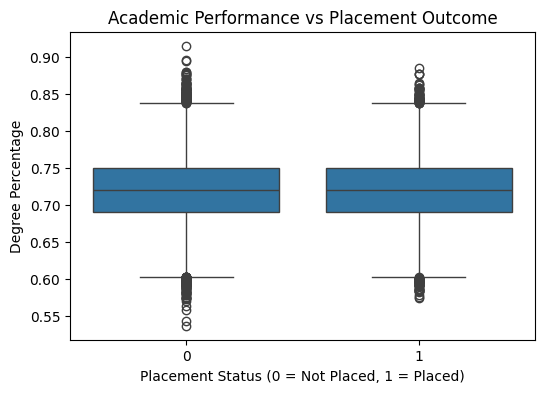

INSIGHTS:
 1. Shows how academic performance differs between placed and not placed candidates.
 2. Higher median scores → better placement chances.


In [125]:
# step :8 Analyst Tasks (EDA & ML Analytics)
# Candidate Performance Analysis
# Academic scores vs placement outcome

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x='status', y='academic_score', data=df_ml)
plt.title("Academic Performance vs Placement Outcome")
plt.xlabel("Placement Status (0 = Not Placed, 1 = Placed)")
plt.ylabel("Degree Percentage")
plt.show()

print("INSIGHTS:\n 1. Shows how academic performance differs between placed and not placed candidates.\n 2. Higher median scores → better placement chances.")


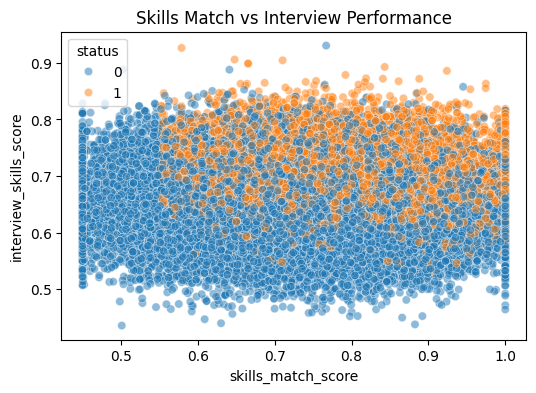

INSIGHTS:
1. Candidates with better skill alignment tend to perform better in interviews.



In [126]:
# Skills match vs interview performance
import seaborn as sns
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='skills_match_score',
    y='interview_skills_score',
    hue='status',
    data=df_ml,
    alpha=0.5
)
plt.title("Skills Match vs Interview Performance")
plt.show()

print("INSIGHTS:\n1. Candidates with better skill alignment tend to perform better in interviews.\n") 


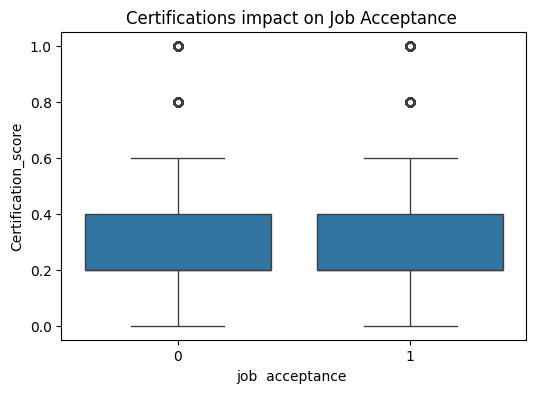

INSIGHTS:
1. Certifications increase acceptance probability but are not the sole deciding factor.


In [127]:
# Certification impact on job acceptance


plt.figure(figsize=(6,4))
sns.boxplot(x='status', y='certification_score', data=df_ml)
plt.title("Certifications impact on Job Acceptance ")
plt.xlabel("job  acceptance ")
plt.ylabel("Certification_score")
plt.show()

print("INSIGHTS:\n1. Certifications increase acceptance probability but are not the sole deciding factor." )


In [128]:
#Placement & Acceptance Analysis
# Acceptance rate by company tier
print(pd.crosstab(df_ml["company_tier"], df_ml["status"]))

print("INSIGHTS:\n 1. All tier companies accpetance rate seems conctant.")

status            0     1
company_tier             
0.4            8743  3823
0.7           13253  5803
1.0           13925  5953
INSIGHTS:
 1. All tier companies accpetance rate seems conctant.


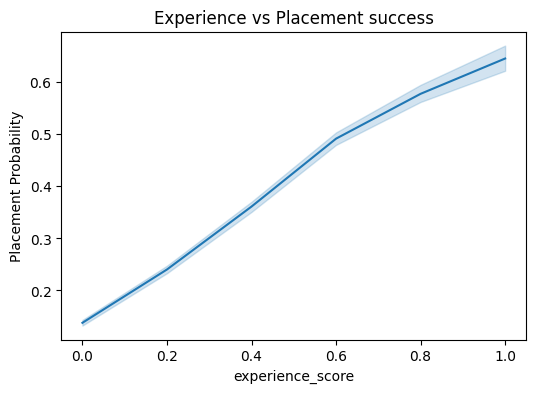

INSIGHTS:
 1. Placement probability increases with experience until saturation.


In [129]:
# Experience vs placement success
plt.figure(figsize=(6,4))
sns.lineplot(x='experience_score', y='status', data=df_ml)
plt.title("Experience vs Placement success")
plt.ylabel("Placement Probability")
plt.show()

print("INSIGHTS:\n 1. Placement probability increases with experience until saturation.")


Axes(0.125,0.11;0.775x0.77)
INSIGTHS: 
 1. Higher competition levels significantly reduce acceptance chances.


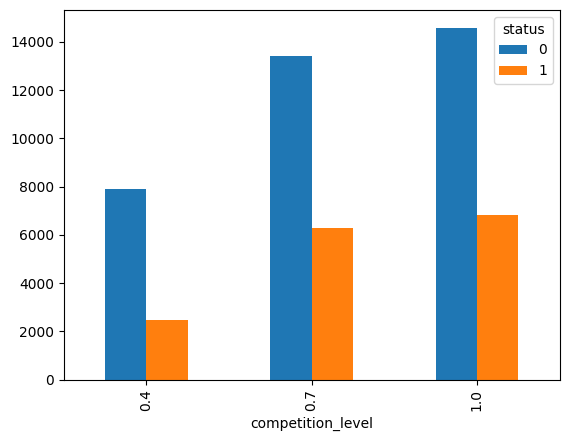

In [130]:
# Competition level impact on acceptance
print(pd.crosstab(df_ml["competition_level"], df_ml["status"]).plot(kind="bar"))
print("INSIGTHS: \n 1. Higher competition levels significantly reduce acceptance chances.")


INSIGHTS:
 1. Interview score is a strong predictor.


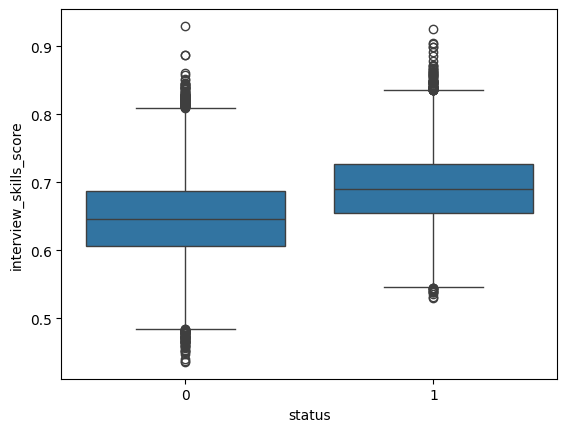

In [131]:
# Interview & Evaluation Analysis
# Interview score vs placement probability

sns.boxplot(x="status", y="interview_skills_score", data=df_ml)

print("INSIGHTS:\n 1. Interview score is a strong predictor.")

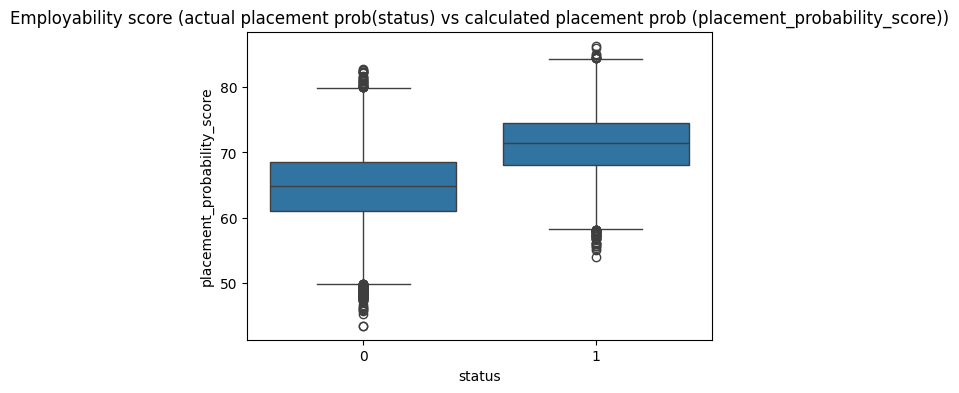

INSIGHT : On average, placed candidates receive higher employability scores.


In [132]:
# Employability test score analysis
plt.figure(figsize=(6,4))
sns.boxplot(x='status', y='placement_probability_score', data=df_ml)
plt.title("Employability score (actual placement prob(status) vs calculated placement prob (placement_probability_score))")
plt.show()

print("INSIGHT : On average, placed candidates receive higher employability scores.")

In [133]:
# Operational Insights
# Dropout risk identification

filtered_df = df[
    (df_ml["placement_probability_score"] > 70) & (df_ml["status"] == 0)]
print(len(filtered_df))

print("INSIGHT : Even some candidates possess higher probability placement score, there are some dropouts which means still not placed. ")

6381
INSIGHT : Even some candidates possess higher probability placement score, there are some dropouts which means still not placed. 


In [134]:
# Feature importance analysis - perfomed in ML MODELLING


INSIGHT : It is clear that 70% of our data is not placed and only  30% is placed..the data is biased. Hence we performed over sampling while training machine learning model to produce better accuarcy.


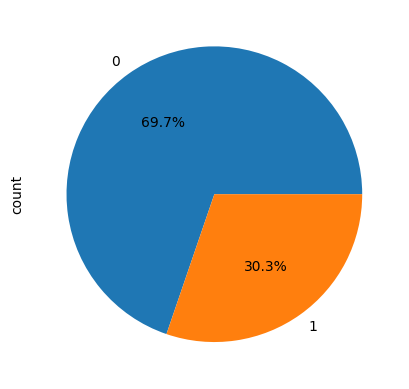

In [135]:
# Bias-aware demographic analysis
df_ml["status"].value_counts().plot(kind='pie', autopct="%1.1f%%")

print("INSIGHT : It is clear that 70% of our data is not placed and only  30% is placed..the data is biased. Hence we performed over sampling while training machine learning model to produce better accuarcy.")

In [136]:
# create a new csv file  containing the cleaned data and with derived features
df_ml.to_csv("cleaned_placement_data.csv", index=False)